In [32]:
import fiftyone as fo

name = "my-dataset"
data_path = "./data/JPEGImages"
labels_path = "./data/Annotations/"

dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.VOCDetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
    name=name,
)

 100% |█████████████| 33793/33793 [2.8m elapsed, 0s remaining, 642.2 samples/s]      


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import fiftyone as fo

dataset = fo.load_dataset("my-dataset")

In [4]:
print(dataset)

Name:        my-dataset
Media type:  image
Num samples: 33793
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [7]:
labels = dataset.values("ground_truth.detections.label")

In [17]:
# The annoation data for the first image
dataset.values("ground_truth")[0]

<Detections: {
    'detections': [
        <Detection: {

            'id': '67d5cb7074a745da1280a0b8',

            'attributes': {},

            'tags': [],

            'label': 'Battery',

            'bounding_box': [

                0.46,

                0.3466666666666667,

                0.043333333333333335,

                0.14666666666666667,

            ],

            'mask': None,

            'mask_path': None,

            'confidence': None,

            'index': None,

            'keyframe': True,

            'track_id': 0,

            'truncated': 0,

            'difficult': 0,

            'occluded': 0,

            'pose': 'Unspecified',

        }>,
    ],
}>

In [8]:
all_labels = [label[0] for label in labels]

In [9]:
from collections import Counter

In [10]:
label_counter = Counter(all_labels)

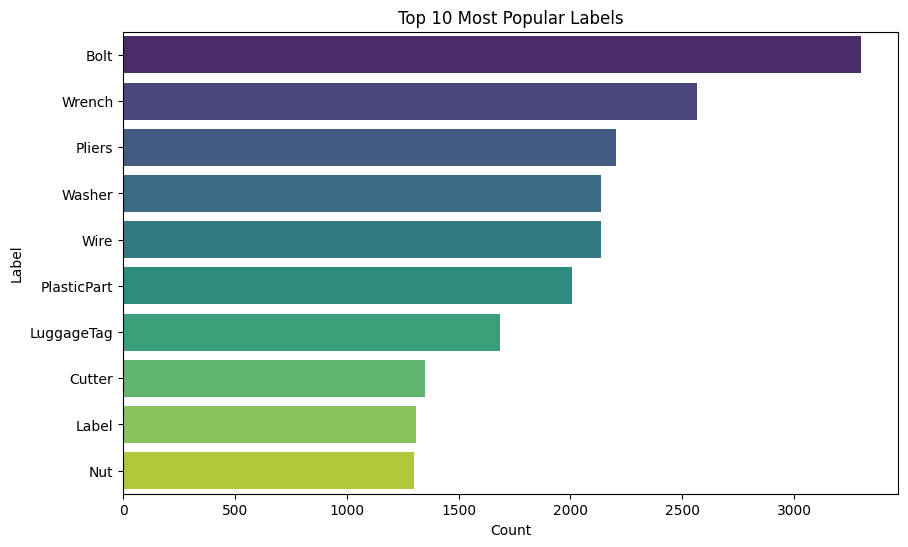

In [11]:
top_10 = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)[:10]

labels, counts = zip(*top_10)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels), palette="viridis", hue=list(labels), legend=False)

plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Top 10 Most Popular Labels")
plt.show()

In [14]:
# Bounding box of the first observation
dataset.values("ground_truth.detections.bounding_box")[0]

[[0.46, 0.3466666666666667, 0.043333333333333335, 0.14666666666666667]]